# Sparse Identification of Nonlinear Dynamical Systems (SINDy) examples

This notebook shows implementation of the example systems from the paper "[Discovering governing equations from data: Sparse identification of nonlinear dynamical systems](https://www.pnas.org/content/113/15/3932)". For full details regarding each example, see the original paper.

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat

from context import sindy
from sindy import SINDy
from sindy.optimizers import STLSQ
from sindy.feature_library import PolynomialLibrary

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Simple illustrative systems

## Linear 2D ODE

The first example shows a demonstration of SINDy on a linear two-dimensional damped harmonic oscillator.

In [2]:
# generate training data

f = lambda x,t : [-.1*x[0] + 2*x[1], -2*x[0] - .1*x[1]]
dt = .01
t_train = np.arange(0,25,dt)
x0_train = [2,0]
x_train = odeint(f, x0_train, t_train)

In [3]:
# fit the model

poly_order = 5
threshold = 0.05

model = SINDy(optimizer=STLSQ(threshold=threshold), feature_library=PolynomialLibrary(degree=poly_order))
model.fit(x_train, t=dt)
model.print()

x0' = -0.100 x0 + 2.000 x1
x1' = -2.000 x0 + -0.100 x1


[Text(0, 0.5, '$x_2$'), Text(0.5, 0, '$x_1$')]

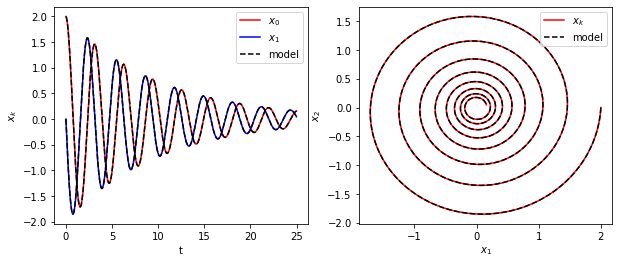

In [4]:
# simulate and plot the results

x_sim = model.simulate(x0_train,t_train)

fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(t_train, x_train[:,0], 'r', label='$x_0$')
axs[0].plot(t_train, x_train[:,1], 'b', label='$x_1$')
axs[0].plot(t_train, x_sim[:,0], 'k--', label='model')
axs[0].plot(t_train, x_sim[:,1], 'k--')
axs[0].legend()
axs[0].set(xlabel='t', ylabel='$x_k$')

axs[1].plot(x_train[:,0], x_train[:,1], 'r', label='$x_k$')
axs[1].plot(x_sim[:,0], x_sim[:,1], 'k--', label='model')
axs[1].legend()
axs[1].set(xlabel='$x_1$', ylabel='$x_2$')

## Cubic 2D ODE

SINDy can also identify a nonlinear two-dimensional damped harmonic oscillator. This example has cubic dynamics.

In [5]:
# generate training data

f = lambda x,t : [-.1*x[0]**3 + 2*x[1]**3, -2*x[0]**3 - .1*x[1]**3]
dt = .01
t_train = np.arange(0,25,dt)
x0_train = [2,0]
x_train = odeint(f, x0_train, t_train)

In [6]:
# fit the model

poly_order = 5
threshold = 0.05

model = SINDy(optimizer=STLSQ(threshold=threshold), feature_library=PolynomialLibrary(degree=poly_order))
model.fit(x_train, t=dt)
model.print()

x0' = -0.100 x0^3 + 1.999 x1^3
x1' = -1.999 x0^3 + -0.100 x1^3


[Text(0, 0.5, '$x_2$'), Text(0.5, 0, '$x_1$')]

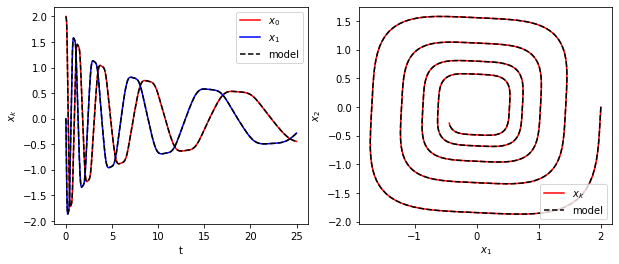

In [7]:
# simulate and plot the results

x_sim = model.simulate(x0_train,t_train)

fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(t_train, x_train[:,0], 'r', label='$x_0$')
axs[0].plot(t_train, x_train[:,1], 'b', label='$x_1$')
axs[0].plot(t_train, x_sim[:,0], 'k--', label='model')
axs[0].plot(t_train, x_sim[:,1], 'k--')
axs[0].legend()
axs[0].set(xlabel='t', ylabel='$x_k$')

axs[1].plot(x_train[:,0], x_train[:,1], 'r', label='$x_k$')
axs[1].plot(x_sim[:,0], x_sim[:,1], 'k--', label='model')
axs[1].legend()
axs[1].set(xlabel='$x_1$', ylabel='$x_2$')

## Linear 3D ODE

This example shows the identification of a linear system in 3D.

In [8]:
# generate training data

f = lambda x,t : [-.1*x[0] + 2*x[1], -2*x[0] - .1*x[1], -0.3*x[2]]
dt = .01
t_train = np.arange(0,50,dt)
x0_train = [2,0,1]
x_train = odeint(f, x0_train, t_train)

In [9]:
# fit the model

poly_order = 5
threshold = 0.05

model = SINDy(optimizer=STLSQ(threshold=threshold), feature_library=PolynomialLibrary(degree=poly_order))
model.fit(x_train, t=dt)
model.print()

x0' = -0.100 x0 + 2.000 x1
x1' = -2.000 x0 + -0.100 x1
x2' = -0.300 x2


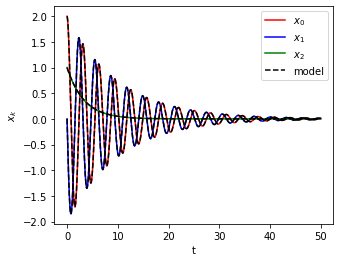

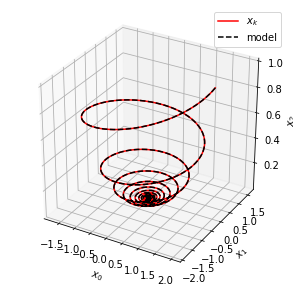

In [10]:
# simulate and plot the results

x_sim = model.simulate(x0_train,t_train)

fig = plt.figure(figsize=(5,4))
plt.plot(t_train, x_train[:,0], 'r', label='$x_0$')
plt.plot(t_train, x_train[:,1], 'b', label='$x_1$')
plt.plot(t_train, x_train[:,2], 'g', label='$x_2$')
plt.plot(t_train, x_sim[:,0], 'k--', label='model')
plt.plot(t_train, x_sim[:,1], 'k--')
plt.plot(t_train, x_sim[:,2], 'k--')
plt.legend()
plt.xlabel('t')
plt.ylabel('$x_k$')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_train[:,0], x_train[:,1], x_train[:,2], 'r', label='$x_k$')
ax.plot(x_sim[:,0], x_sim[:,1], x_sim[:,2], 'k--', label='model')
ax.set(xlabel='$x_0$', ylabel='$x_1$', zlabel='$x_2$')
ax.legend()

# Lorenz system (nonlinear ODE)

The Lorenz system serves as an example of a nonlinear ODE.

In [11]:
# generate training data

lorenz = lambda x,t : [10*(x[1] - x[0]), x[0]*(28 - x[2]) - x[1], x[0]*x[1] - 8/3*x[2]]
dt = .001
t_train = np.arange(0,100,dt)
x0_train = [-8,8,27]
x_train = odeint(lorenz, x0_train, t_train)
x_dot_train_measured = np.array([lorenz(x_train[i],0) for i in range(t_train.size)])

## Measure states $x$ and derivatives $\dot{x}$

In this example, both the states $x$ and derivatives $\dot{x}$ of the Lorenz system are measures, and increasing levels of noise are added to the derivatives.

In [12]:
# fit the models and simulate

poly_order = 5
threshold = 0.05

noise_levels = [1e-4,1e-3,1e-2,1e-1,1.]

models = []
t_sim = np.arange(0,20,dt)
x_sim = []
for eps in noise_levels:
    model = SINDy(optimizer=STLSQ(threshold=threshold), feature_library=PolynomialLibrary(degree=poly_order))
    model.fit(x_train, t=dt, x_dot = x_dot_train_measured + np.random.normal(scale=eps, size=x_train.shape))
    models.append(model)
    x_sim.append(model.simulate(x_train[0], t_sim))

Text(0, 0.5, 'y')

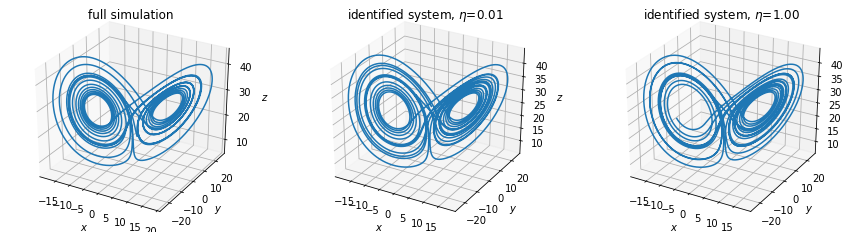

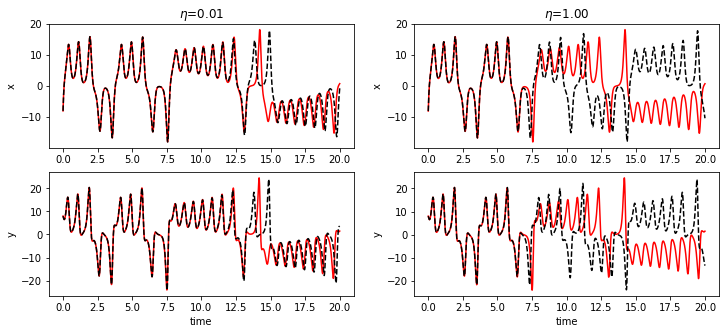

In [13]:
# plot results

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(131, projection='3d')
ax.plot(x_train[:t_sim.size,0], x_train[:t_sim.size,1], x_train[:t_sim.size,2])
plt.title('full simulation')
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')

model_idx = 2
ax = fig.add_subplot(132, projection='3d')
ax.plot(x_sim[model_idx][:,0], x_sim[model_idx][:,1], x_sim[model_idx][:,2])
plt.title('identified system, $\eta$=%.2f' % noise_levels[model_idx])
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')

model_idx = 4
ax = fig.add_subplot(133, projection='3d')
ax.plot(x_sim[model_idx][:,0], x_sim[model_idx][:,1], x_sim[model_idx][:,2])
plt.title('identified system, $\eta$=%.2f' % noise_levels[model_idx])
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')

fig = plt.figure(figsize=(12,5))
model_idx = 2
ax = fig.add_subplot(221)
ax.plot(t_sim, x_train[:t_sim.size,0], 'r')
ax.plot(t_sim, x_sim[model_idx][:,0], 'k--')
plt.title('$\eta$=%.2f' % noise_levels[model_idx])
plt.ylabel('x')

ax = fig.add_subplot(223)
ax.plot(t_sim, x_train[:t_sim.size,1], 'r')
ax.plot(t_sim, x_sim[model_idx][:,1], 'k--')
plt.xlabel('time')
plt.ylabel('y')

model_idx = 4
ax = fig.add_subplot(222)
ax.plot(t_sim, x_train[:t_sim.size,0], 'r')
ax.plot(t_sim, x_sim[model_idx][:,0], 'k--')
plt.title('$\eta$=%.2f' % noise_levels[model_idx])
plt.ylabel('x')

ax = fig.add_subplot(224)
ax.plot(t_sim, x_train[:t_sim.size,1], 'r')
ax.plot(t_sim, x_sim[model_idx][:,1], 'k--')
plt.xlabel('time')
plt.ylabel('y')

## Measure only the states $x$, compute the derivatives

In this example, only the states $x$ are measured and noise at different levels is added to the states. Derivatives are computed from the noisy state measurements using centered difference.

In [14]:
# fit the models and simulate

noise_levels = [1e-4,1e-3,1e-2,1e-1,1.]

models_noD = []
t_sim = np.arange(0,20,dt)
x_sim_noD = []
for eps in noise_levels:
    model = SINDy(optimizer=STLSQ(threshold=threshold), feature_library=PolynomialLibrary(degree=poly_order))
    model.fit(x_train + np.random.normal(scale=eps, size=x_train.shape), t=dt)
    models_noD.append(model)
    x_sim_noD.append(model.simulate(x_train[0], t_sim))

## Compare the errors in each case

Text(0.5, 1.0, 'measure $x$, compute $\\dot{x}$')

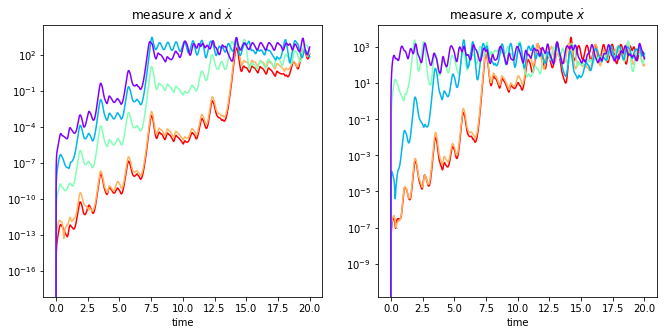

In [15]:
colors = rainbow(np.linspace(1,0,len(models)))

fig = plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
for i,x in enumerate(x_sim):
    plt.semilogy(t_sim, np.sum((x - x_train[:t_sim.size])**2,axis=1), color=colors[i])
plt.xlabel('time')
plt.title('measure $x$ and $\dot{x}$')

plt.subplot(1,2,2)
for i,x in enumerate(x_sim_noD):
    plt.semilogy(t_sim, np.sum((x - x_train[:t_sim.size])**2,axis=1), color=colors[i])
plt.xlabel('time')
plt.title('measure $x$, compute $\dot{x}$')

# Fluid wake behind a cylinder (nonlinear PDE)

This example demonstrates the application of SINDy to a high-dimensional nonlinear partial differential equation. The two-dimensional Navier-Stokes equations are simulated to generate state measurements for fluid flow past a cylinder at Reynolds number 100. The proper orthogonal decomposition (POD) is applied to the high-dimensional state measurements (with dimensionality determined by the number of grid points in the simulation) to get a low-dimensional representation of the dynamics. SINDy is then applied to the dynamics in the first three POD modes.

In [16]:
# load training data

dt = 0.02
r = 2
n = r+1

data_run1 = loadmat('data/PODcoefficients.mat')
x_run1 = np.concatenate((data_run1['alpha'][:5000,:r],data_run1['alphaS'][:5000,0:1]), axis=1)
t_run1 = np.arange(0,dt*x_run1.shape[0],dt)

data_run2 = loadmat('data/PODcoefficients_run1.mat')
x_run2 = np.concatenate((data_run2['alpha'][:3000,:r],data_run2['alphaS'][:3000,0:1]), axis=1)
t_run2 = np.arange(0,dt*x_run2.shape[0],dt)

x_train = [x_run1, x_run2]
t_train = [t_run1, t_run2]

In [17]:
# fit the model

optimizer = STLSQ(threshold=1e-4)
library = PolynomialLibrary(degree=5)
model = SINDy(optimizer=optimizer, feature_library=library, feature_names=['x','y','z'])
model.fit(x_train, t_train, multiple_trajectories=True)
model.print()

x' = -0.133  + -0.009 x + -1.023 y + -0.001 z + -0.002 y z
y' = -0.057  + 1.035 x + 0.005 y + 0.002 x z + -0.002 y z
z' = -20.653  + -0.294 z + 0.001 x^2 + 0.001 y^2 + -0.001 z^2


In [18]:
# simulate the model

x_simulate_run1 = model.simulate(x_run1[0], np.arange(0,100,.02))
x_simulate_run2 = model.simulate(x_run2[0], np.arange(0,95,.02))

Text(0.5, 0.92, 'Identified System')

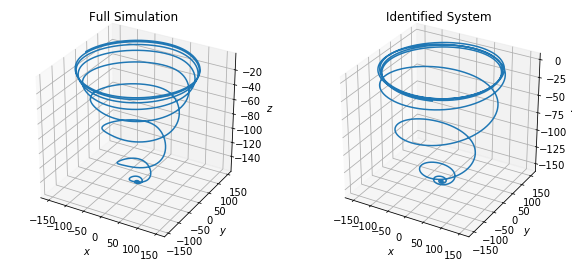

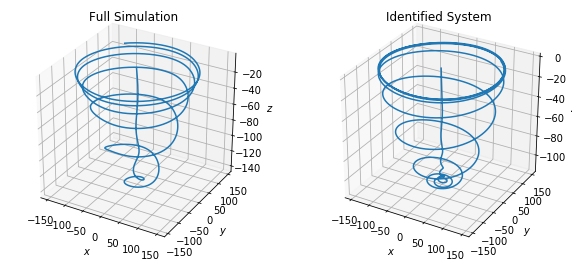

In [19]:
# plot results

fig = plt.figure(figsize=(10,4.5))
ax = fig.add_subplot(121, projection='3d')
ax.plot(x_run1[:,0],x_run1[:,1],x_run1[:,2])
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
plt.title('Full Simulation')

ax = fig.add_subplot(122, projection='3d')
ax.plot(x_simulate_run1[:,0],x_simulate_run1[:,1],x_simulate_run1[:,2])
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
plt.title('Identified System')

fig = plt.figure(figsize=(10,4.5))
ax = fig.add_subplot(121, projection='3d')
ax.plot(x_run2[:,0],x_run2[:,1],x_run2[:,2])
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
plt.title('Full Simulation')

ax = fig.add_subplot(122, projection='3d')
ax.plot(x_simulate_run2[:,0],x_simulate_run2[:,1],x_simulate_run2[:,2])
ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
plt.title('Identified System')

# Bifurcations and normal forms

These examples demonstate the ability of SINDy to incorporate parameterized dynamical systems (e.g. normal forms associated with a bifurcation parameter). Note that the parameter in these examples is included in the dynamics as a variable (not learned).

## Logistic map

This is a discrete time example that exhibits several bifurcations.

In [20]:
# generate training data

N = 1000
rs = [2.5, 2.75, 3, 3.25, 3.5, 3.75, 3.8, 3.85, 3.9, 3.95]
eps = 0.005
x = np.zeros((len(rs),N,2))
for i,r in enumerate(rs):
    x[i,0,0] = 0.5
    x[i,0,1] = r
    for k in range(1,N):
        x[i,k,0] = np.maximum(np.minimum(r*x[i,k-1,0]*(1-x[i,k-1,0]) + eps*np.random.randn(), 1.), 0.)
        x[i,k,1] = r
x_train = x[:,:-1,:].reshape((-1,2))
x_dot_train = x[:,1:,:].reshape((-1,2))

In [21]:
# fit the model

optimizer = STLSQ(threshold=.1)
library = PolynomialLibrary(degree=5)
model = SINDy(optimizer=optimizer, feature_library=library)
model.fit(x_train, t=1, x_dot=x_dot_train)
model.print()

x0' = 1.000 x0 x1 + -1.000 x0^2 x1
x1' = 1.000 x1


In [22]:
# generate test data

rs = np.arange(1,4,.005)
x_test = np.zeros((rs.size*1000,2))
idx = 0
for r in rs:
    xold = 0.5
    for i in range(1000):
        xnew = np.maximum(np.minimum(r*xold - r*xold**2 + eps*np.random.randn(),1.),0.)         
        xold = xnew
    xss = xnew
    for i in range(1000):              
        xnew = np.maximum(np.minimum(r*xold - r*xold**2 + eps*np.random.randn(),1.),0.)          
        xold = xnew
        x_test[idx,0] = xnew
        x_test[idx,1] = r
        idx += 1
        if(np.abs(xnew-xss)<.001):
            break
x_test = x_test[:idx]

In [23]:
# simulate on test data

rs = np.arange(1,4,.005)
x_sim = np.zeros((rs.size*1000,2))
idx = 0
for r in rs:
    xold = 0.5
    for i in range(1000):
        xnew = model.predict(np.array([[xold,r]]))[0,0]
        xold = xnew
    xss = xnew
    for i in range(1000):              
        xnew = model.predict(np.array([[xold,r]]))[0,0]
        xold = xnew
        x_sim[idx,0] = xnew
        x_sim[idx,1] = r
        idx += 1
        if(np.abs(xnew-xss)<.001):
            break
x_sim = x_sim[:idx]

Text(0, 0.5, '$\\mu$')

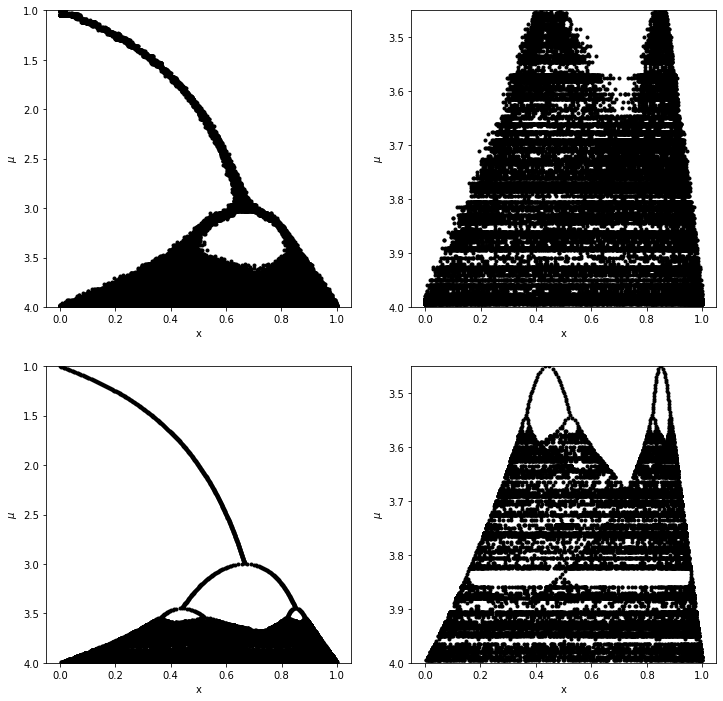

In [24]:
# plot results

fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(x_test[:,0], x_test[:,1], 'k.')
plt.gca().set_ylim([4,1])
plt.xlabel('x')
plt.ylabel('$\mu$')

plt.subplot(2,2,2)
plt.plot(x_test[:,0], x_test[:,1], 'k.')
plt.gca().set_ylim([4,3.45])
plt.xlabel('x')
plt.ylabel('$\mu$')

plt.subplot(2,2,3)
plt.plot(x_sim[:,0], x_sim[:,1], 'k.')
plt.gca().set_ylim([4,1])
plt.xlabel('x')
plt.ylabel('$\mu$')

plt.subplot(2,2,4)
plt.plot(x_sim[:,0], x_sim[:,1], 'k.')
plt.gca().set_ylim([4,3.45])
plt.xlabel('x')
plt.ylabel('$\mu$')

## Hopf normal form

The example shows the identification of the Hopf normal form, which is a parameterized normal form in continuous time.

In [25]:
# generate training data

hopf =lambda x,mu,omega,A : [mu*x[0] - omega*x[1] - A*x[0]*(x[0]**2+x[1]**2),
                             omega*x[0] + mu*x[1] - A*x[1]*(x[0]**2+x[1]**2)]
omega = 1
A = 1

dt = .0025
t_train = np.arange(0,75,dt)

mu_stable = np.array([-.15, -.05])
mu_unstable = np.array([.05, .15, .25, .35, .45, .55])

n_ics = mu_stable.size+2*mu_unstable.size
x_train = [np.zeros((t_train.size,3)) for i in range(n_ics)]
eps = 0.001
ic_idx = 0

for mu in mu_stable:
    x0_train = [2,0]
    x = odeint(lambda x,t : hopf(x,mu,omega,A), x0_train, t_train)
    x_train[ic_idx][:,0:2] = x + eps*np.random.normal(size=x.shape)
    x_train[ic_idx][:,2] = mu
    ic_idx += 1
    
for mu in mu_unstable:
    x0_train = [0.01,0]
    x = odeint(lambda x,t : hopf(x,mu,omega,A), x0_train, t_train)
    x_train[ic_idx][:,0:2] = x + eps*np.random.normal(size=x.shape)
    x_train[ic_idx][:,2] = mu
    ic_idx += 1
    
    x0_train = [2,0]
    x = odeint(lambda x,t : hopf(x,mu,omega,A), x0_train, t_train)
    x_train[ic_idx][:,0:2] = x + eps*np.random.normal(size=x.shape)
    x_train[ic_idx][:,2] = mu
    ic_idx += 1

In [26]:
# fit the model

optimizer = STLSQ(threshold=.85)
library = PolynomialLibrary(degree=5)
model = SINDy(optimizer=optimizer, feature_library=library)
model.fit(x_train, t=dt, multiple_trajectories=True)
model.print()

x0' = -1.000 x1 + 0.995 x0 x2 + -0.995 x0^3 + -0.996 x0 x1^2
x1' = 1.000 x0 + 0.999 x1 x2 + -0.999 x0^2 x1 + -0.999 x1^3
x2' = 0.000


In [27]:
# simulate the model

x_sim = [np.zeros((t_train.size,3)) for i in range(n_ics)]
ic_idx = 0

for mu in mu_stable:
    x0_train = np.array([2,0,mu])
    x_sim[ic_idx] = model.simulate(x0_train, t_train)
    ic_idx += 1
    
for mu in mu_unstable:
    x0_train = np.array([0.01,0,mu])
    x_sim[ic_idx] = model.simulate(x0_train, t_train)
    ic_idx += 1
    
    x0_train = np.array([2,0,mu])
    x_sim[ic_idx] = model.simulate(x0_train, t_train)
    ic_idx += 1

Text(0.5, 0.92, 'Identified System')

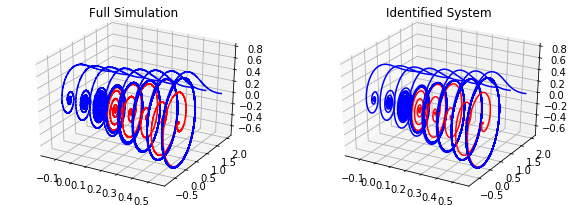

In [28]:
# plot results

fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(121, projection='3d')
for i in range(n_ics):
    if i > 2 and i % 2 == 0:
        ax.plot(x_train[i][:,2],x_train[i][:,0],x_train[i][:,1], 'r')
    else:
        ax.plot(x_train[i][:,2],x_train[i][:,0],x_train[i][:,1], 'b')
plt.title('Full Simulation')

ax = fig.add_subplot(122, projection='3d')
for i in range(n_ics):
    if i > 2 and i % 2 == 0:
        ax.plot(x_sim[i][:,2],x_sim[i][:,0],x_sim[i][:,1], 'r')
    else:
        ax.plot(x_sim[i][:,2],x_sim[i][:,0],x_sim[i][:,1], 'b')
plt.title('Identified System')